In [4]:
import io, os, sys, types
from nbformat import read
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter

formatter = HtmlFormatter()
lexer = PythonLexer()
from IPython.display import HTML, Image, SVG
from IPython.display import Markdown as md
from base64 import b64decode

def show_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    for cell in nb.cells:
        #print(cell)
        #print(cell.cell_type)
        if cell.cell_type == 'code':
            #print(len(cell['outputs']))
            for op in cell['outputs']:
                #print(op)
                if op['output_type']=='execute_result' or  op['output_type']=='display_data':
                    for k,v in op["data"].items():
                        #print(k)
                        if k=="text/html":
                            display(HTML(v))
                            break
                        elif k == "image/svg+xml":
                            display(SVG(v))
                            break
                        elif k == "image/png":
                            print(op['metadata'])
                            display(Image(b64decode(v),**op['metadata']['image/png']))
                            #print(op)
                            break
                        elif k =="text/markdown":
                            display(md(v))
                            break
                        elif k=="text/plain":
                            display(v)
                            break
                        else:
                            raise Exception("unknown op type "+k)
                #elif op['output_type']=='display_data':
                #    print(op)  
                else:
                     raise Exception("unknown op type "+op['output_type'])
        elif cell.cell_type == 'markdown':
            display(md(cell.source))
            #html.append("<pre>%s</pre>" % md(cell.source))
        else:
            #html.append("<pre>%s</pre>" % cell.source)
            display(HTML(cell.source))

As long as there is evidence based researh, researches used models to describe the system they are focusing on. Classically these models are relying a lot on theories about the systems, how individual parts interact and influence each other and how certain external changes might change the system. These models are mosly idealised and simplified represenation of real systems which are used to descripe and predict natuarly occurend phenomena as best as possible.

A basic example for this is Copernican heliocentrism, a model describing the motion of planets around the sun in the center of the universe. The model was developed by Nicolaus Copernicus 1543 to describe the motion of the planets in an better and easier way than the previous accepted geocentric models.
This model was later replaced by the Kepler's laws of planetary motion, describing the motion of planets in a eliptic instead of circular motion around the sun, which fits even better to obervations and was later shown to be a good approximation to Newton's laws of motion and gravity.

A model is always a more or less good description of reality which is usefull as long as it describes the system as good as needed and has to be replaced or refined when new obersvations are made, which cannot be described or even contradict the model.

In most cases these models can be described by a certain set of mathematically expressions, describing the relationships of different properties within the model. These expressions are rooted the underlying theory, which aims to gernealize the laws describing the observations.

With the increasing computational power and a wast amount of experimental data in their hands the research in many fields shifted from the usage of hand-crafted models based on defined theories to computer generated, data driven models. These models often rooted in arbitary complex functions with hundrens, thousend or even millions and more of parameters.

**some more indroduction**

For many researchers these types of model are seen as black boxes

**...**

this paper aims to open the black box and give specifically but not exclusively for chemists to give them a better understanding of some of the underlying principles and show how the model results and intermediate representations can be interprated.

Every machine learning model needs a specific, well defined structure as input data. For Molecular data different more or less complex inputstructures are described in literature.
One of the simplest are vectors encoding certain molecular properties of the molecule. Each value in dese vectores encodes a specific property as a numeric value. For properties like the presence of certain groups or substructures this is usually represented as a 1 of present or 0 if not present. Other propteries, experimental or calcualted can also be used as in input vectors. Examples are the molar mass, expermiental solubilities, chromatographic parameters like retention index, physical properties like boiling or melting point and so on. Nearly every numerical value can be used as an element of the input vector, but espiacially for values which have to be experimental determined this limits the training data space significant. For calculated properties, one has to rely on the accuracy of the calculations. For substructure describing feature the problem might occure, that two different molecules can create the same substruccture vector of all the encoded substructures are identical for both molecules. In this case the prediction result for both would also be the same, where in reality the prediced propertiy might be very different. 

Another more complex examlple is the usage of coninous text representations of the molecular structure. In this case usually simplified molecular-input line-entry system (SMILES) strings are used as a text input for the model. These models usually are based on a recurrent neural network (RNN) for arbitrary long SMILES or convolutional or fully connected  neuronal networks for one-hot-encoded SMILES. The later one takes a fixed size input and thus can only work with SMILES up to a specific length.

The technique described in this paper is the one which is propaply the closest the the natual understanding of chemcial structure by chemists: graph convolutional networks (GCN).
GCN take a graph represnetation of the molecular structure as input and propagate the properties of each atom along the the bonds and are lineary combined with other properties. This way atom properties spread across the whole graph (depending on he deepth of the convolutional newtwork) while influencing each other.This results in an overall distribution of combinatin of properties, which finally can be interpreded as new atom wise properties or combined together for one or multiple molecule wide properties.

The paper will start with basic examples to explain the basic functionality of these networks and continue t more complex examples and how they can be interpreded

First off all data driven model designes heavily relies on data. Because of this first data representing the task, in the form of input data and prediction result has to collected, which can then be used to train the models.

For the examples here the data is a mixture of multiple available datasets:
- blah
- blah2

All of the datasets have in common, that they contain molecular representations of the repective molecular structure as a SMILES string. 


,DTXSID,name,CASRN,INCHIKEY,IUPAC_NAME,SMILES,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,DATA_SOURCES,NUMBER_OF_PUBMED_ARTICLES,PUBCHEM_DATA_SOURCES,CPDAT_COUNT,rd_mol,molar_mass,pre_graphs,hybridization
0,DTXSID7020009,Acetonitrile,75-05-8,WEVYAHXRMPXWCK-UHFFFAOYSA-N,Acetonitrile,CC#N,InChI=1S/C2H3N/c1-2-3/h1H3,C2H3N,41.053,41.026549101,165.0,3174.0,1110,318,"<img data-content=""rdkit/molecule"" src=""data:i...",41.053,"(0, 1, 2, 3, 4, 5)","[[False, False, False, False, False, True, Fal..."
1,DTXSID5020023,Acrolein,107-02-8,HGINCPLSRVDWNT-UHFFFAOYSA-N,Prop-2-enal,C=CC=O,"InChI=1S/C3H4O/c1-2-3-4/h2-3H,1H2",C3H4O,56.064,56.026214749,189.0,2468.0,139,30,"<img data-content=""rdkit/molecule"" src=""data:i...",56.064,"(0, 1, 2, 3, 4, 5, 6, 7)","[[False, False, False, False, False, True, Fal..."
2,DTXSID0020024,Acrolein diethylacetal,3054-95-3,MCIPQLOKVXSHTD-UHFFFAOYSA-N,"3,3-Diethoxyprop-1-ene",C=CC(OCC)OCC,"InChI=1S/C7H14O2/c1-4-7(8-5-2)9-6-3/h4,7H,1,5-...",C7H14O2,130.187,130.099379691,45.0,1.0,100,-,"<img data-content=""rdkit/molecule"" src=""data:i...",130.187,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[False, False, False, False, False, True, Fal..."
3,DTXSID5020029,Acrylonitrile,107-13-1,NLHHRLWOUZZQLW-UHFFFAOYSA-N,Prop-2-enenitrile,C=CC#N,"InChI=1S/C3H3N/c1-2-3-4/h2H,1H2",C3H3N,53.064,53.026549101,195.0,1092.0,168,582,"<img data-content=""rdkit/molecule"" src=""data:i...",53.064,"(0, 1, 2, 3, 4, 5, 6)","[[False, False, False, False, False, True, Fal..."
4,DTXSID8020044,Allyl alcohol,107-18-6,XXROGKLTLUQVRX-UHFFFAOYSA-N,Prop-2-en-1-ol,C=CCO,"InChI=1S/C3H6O/c1-2-3-4/h2,4H,1,3H2",C3H6O,58.08,58.041864813,153.0,627.0,152,2,"<img data-content=""rdkit/molecule"" src=""data:i...",58.080,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[[False, False, False, False, False, True, Fal..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,DTXSID30996806,(6-Methylheptan-2-yl)hydrazine,7535-34-4,WAYKZORTCXXXDO-UHFFFAOYNA-N,(6-Methylheptan-2-yl)hydrazine,CC(C)CCCC(C)NN,"InChI=1/C8H20N2/c1-7(2)5-4-6-8(3)10-9/h7-8,10H...",C8H20N2,144.262,144.162648652,6.0,-,-,-,"<img data-content=""rdkit/molecule"" src=""data:i...",144.262,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[False, False, False, False, False, True, Fal..."
3852,DTXSID10998848,2-Chlorooxirane,7763-77-1,WBNCHVFLFSFIGK-UHFFFAOYNA-N,2-Chlorooxirane,ClC1CO1,"InChI=1/C2H3ClO/c3-2-1-4-2/h2H,1H2",C2H3ClO,78.5,77.9872424,6.0,-,-,-,"<img data-content=""rdkit/molecule"" src=""data:i...",78.498,"(0, 1, 2, 3, 4, 5, 6)","[[False, False, True, False, False, False, Fal..."
3853,DTXSID20999144,2-[(Butan-2-yl)oxy]ethan-1-ol,7795-91-7,HUWFDQSAXOIUNP-UHFFFAOYNA-N,2-[(Butan-2-yl)oxy]ethan-1-ol,CCC(C)OCCO,"InChI=1/C6H14O2/c1-3-6(2)8-5-4-7/h6-7H,3-5H2,1...",C6H14O2,118.176,118.099379691,11.0,-,-,-,"<img data-content=""rdkit/molecule"" src=""data:i...",118.176,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[False, False, False, False, False, True, Fal..."
3854,DTXSID70999775,2-Methyl-1-[(propan-2-yl)oxy]propane,78448-33-6,HIIBZFKVMXEQMR-UHFFFAOYSA-N,2-Methyl-1-[(propan-2-yl)oxy]propane,CC(C)COC(C)C,"InChI=1S/C7H16O/c1-6(2)5-8-7(3)4/h6-7H,5H2,1-4H3",C7H16O,116.204,116.120115135,3.0,-,-,-,"<img data-content=""rdkit/molecule"" src=""data:i...",116.204,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[False, False, False, False, False, True, Fal..."


Th smile string is then programatically transformed in a node featurzed graph representation $G(N,E)$.
Meaning that for each atom a node (or vertex) $N$ is created and for each bond an edge $E$ is created. Usually the eges are featurless and thus there will be no distinction between different bond orders.
Each node can be represented by a feature vector $f$ who's values are specific properties of the atom represented by the node, *e.g.*  atomic mass, charge, hybridization, number of connected atoms, atom type. All properties should be directly calculatable and representable by a numerical value. Categorical features like atom type should be represented as one-hot encoded vectors (1 for the specific type and 0 for all others), and not e.g. as integer types (1 for H, 2 for He,...), since this would introduce an natural order which is not a good representation in many cases (Carbon is not 12 times hydrogen, when prediction values like electro negativity). On the other hand from a one-hot-encoded vector it is possible for the model to learn such an order if necessary (see second example).

**some more explain** 

#### Example 1 - Molar mass from atom masses
First we start with a simple example by predicting the molar masses of random molecules from the dataset. As a featurization the mass of each individual atom was used. As a result, to get the molar mass of each respective molecule all features (individual atomic masses) have to be added. 
The process to sum all features together is basically one possibillity for a pooling operation. pooling is usally done at the end of a graph convolution to bring an arbitary shaped graph to an fixed size vecor.
Basic pooling operation are operations to calculate scalar parameters like location parameter (*e.g*.minimum, maximm, average) or the sum over every dimension of the final features of the graph. This results in a vector of a size equal to the number of final features, which is a fixed hyperparameter for the models.
$$f=\Theta(f_0,f_1,...f_{N})$$

If we just perform a simple sum pooling over the inital graph features without any graph convolution or any other layer holding trainable parameters the model is without any trainable parameters and thus training is not necessary (nor possible):

{'image/png': {'width': 400}}


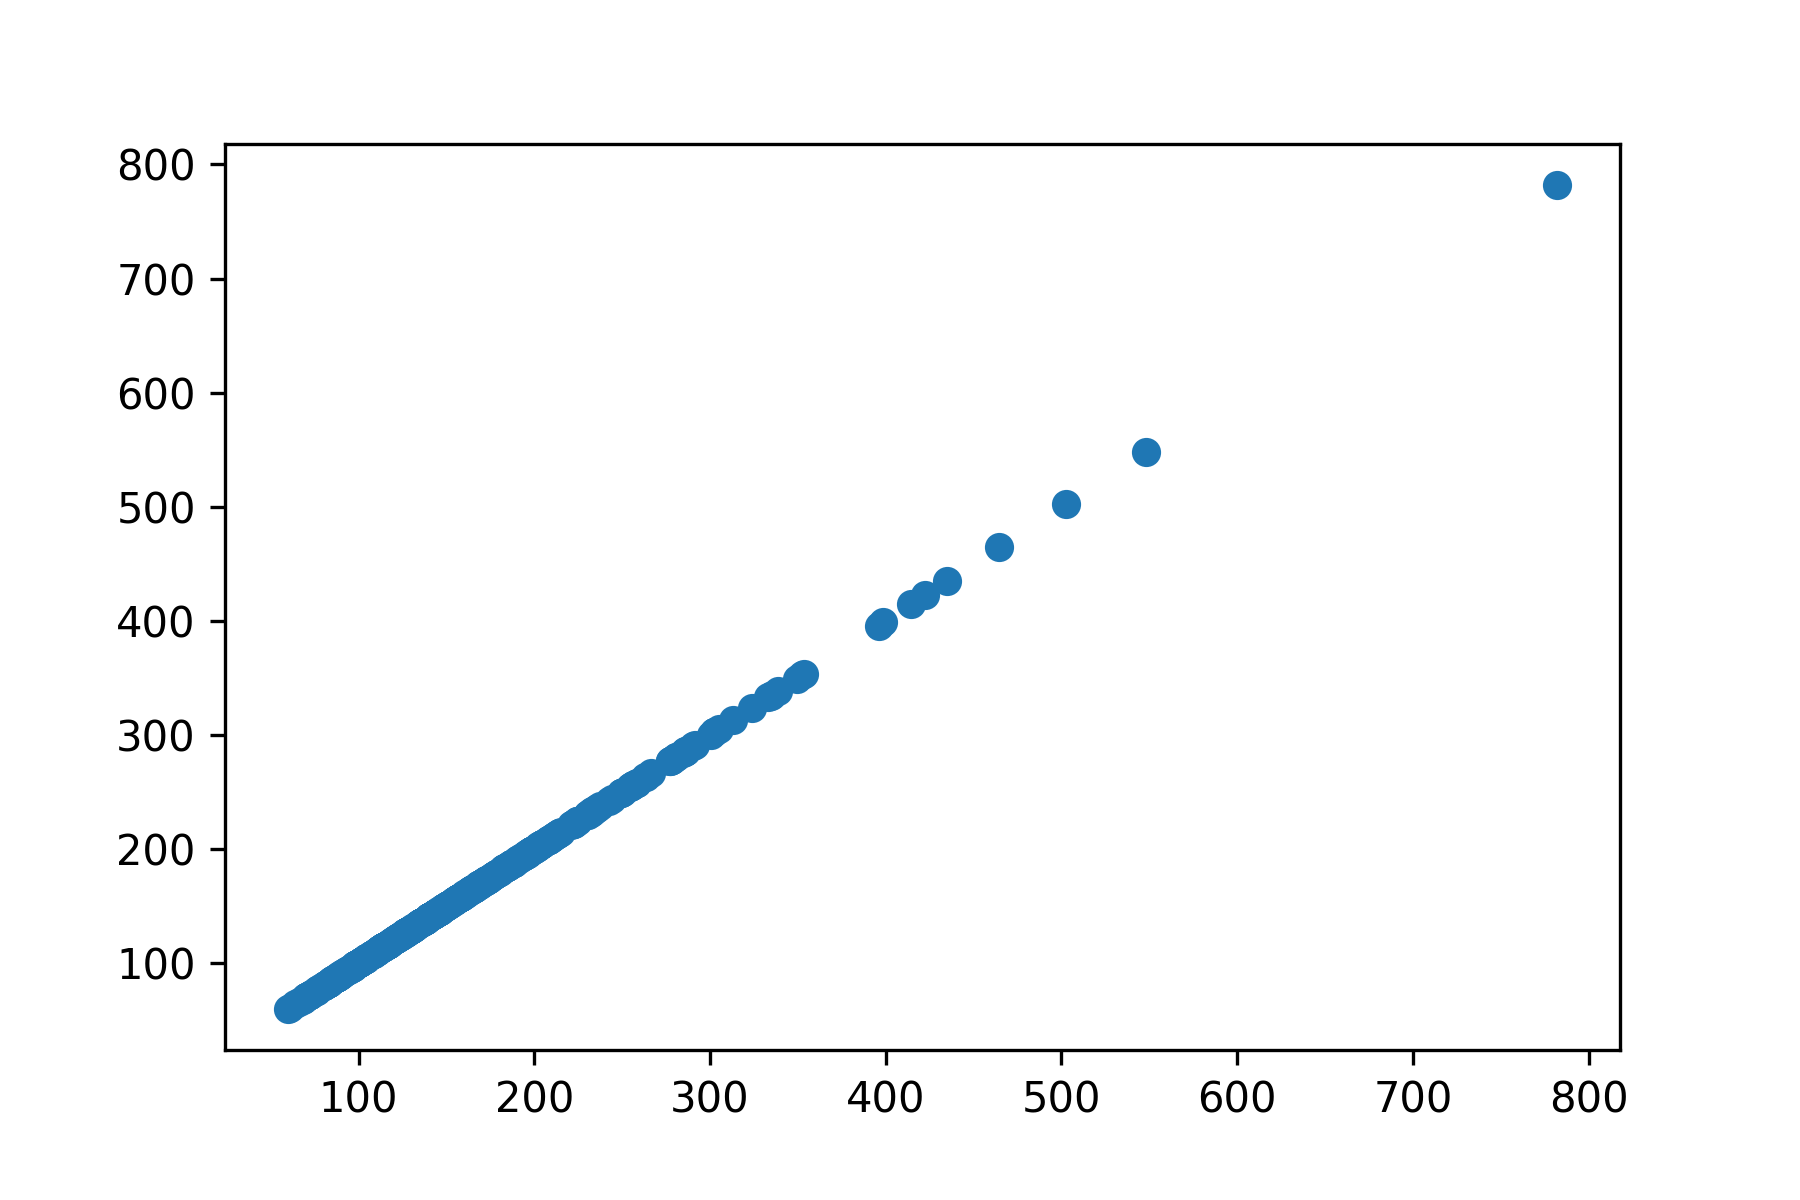

{'image/png': {'width': 400}}


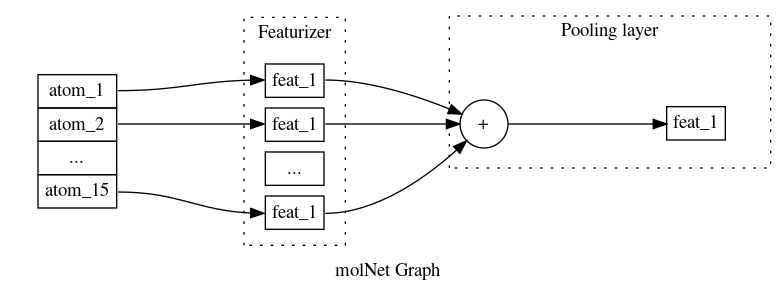

As can be seen the model performs perfectly, which is expected since the result of the pooling has matches the real mass of the underlying molecule.

#### Example 2 - Molar mass from atom types
If the featurizer is replaced with an atom type featurizer simple pooling cannot be applied any more. Nontheless graph convolution is still not necessary since the most basic approch is to somehow get the mass of each atom and then just apply the sum as in the previous example.

One possibility to to so is by using a weighted sum, where each summand is multiplied with a trainable parameter before summation:
$$f=\sum_{i=0}^{N}{w_i*f_i}$$

From a machine learning perspective this is the same as a one of the simplest fully connected neuronal networks with no hidden layers, no bias and only a single output value:

{'image/png': {'width': 400}}


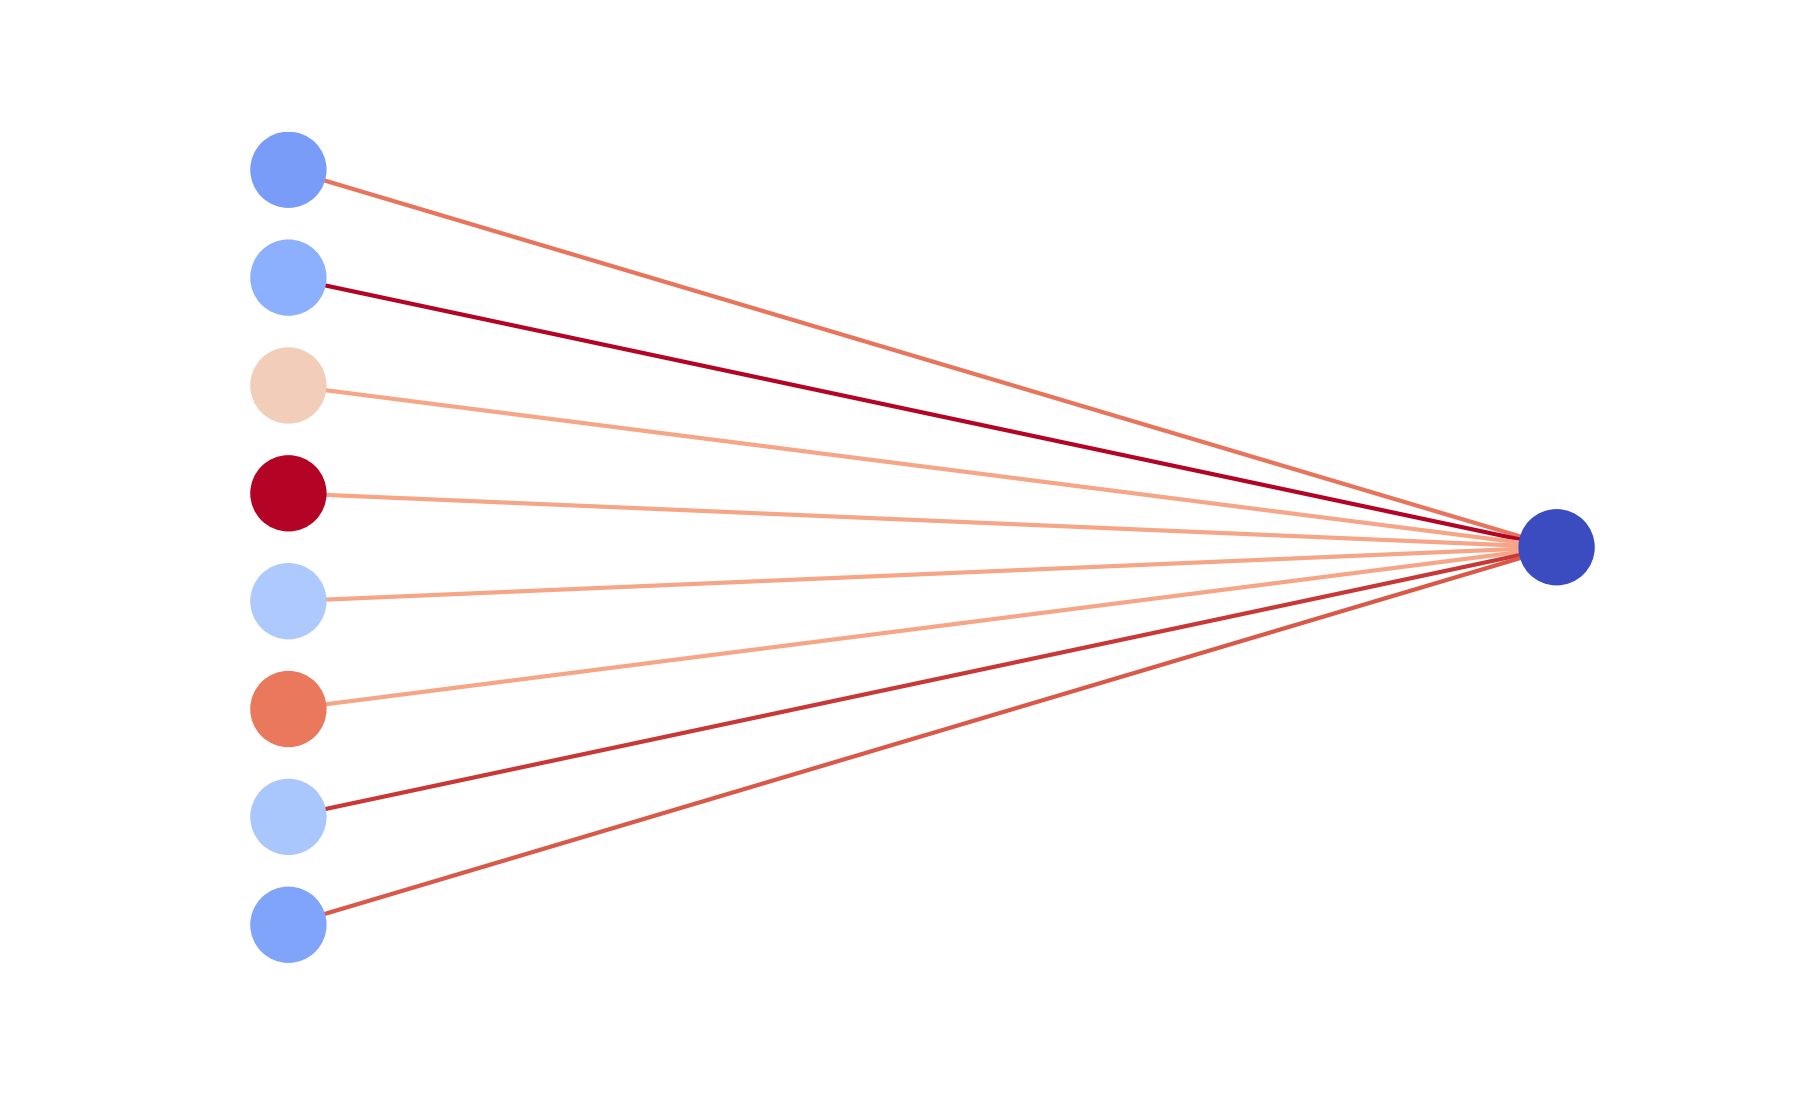

The resulting model contains as many trainable parameters as there are initial features (11), where each feature describes whether the atom that is featurized is one of the following atoms (0 or 1):

"['Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', 'other']"

A carbon atom whould thus be represented by the feature vector:

'[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]'

Note that the featurizer does not featurize all possible atom types but was created to only featurize atoms which are present in the dataset to reduce the size of the model and make it easier to vizualize.

It only takes a few epochs (iterations over the training data) for the model to completly tune the weights of the weighted-sum-network, resulting in a nearly perfect prediction.

{'image/png': {'width': 400}}


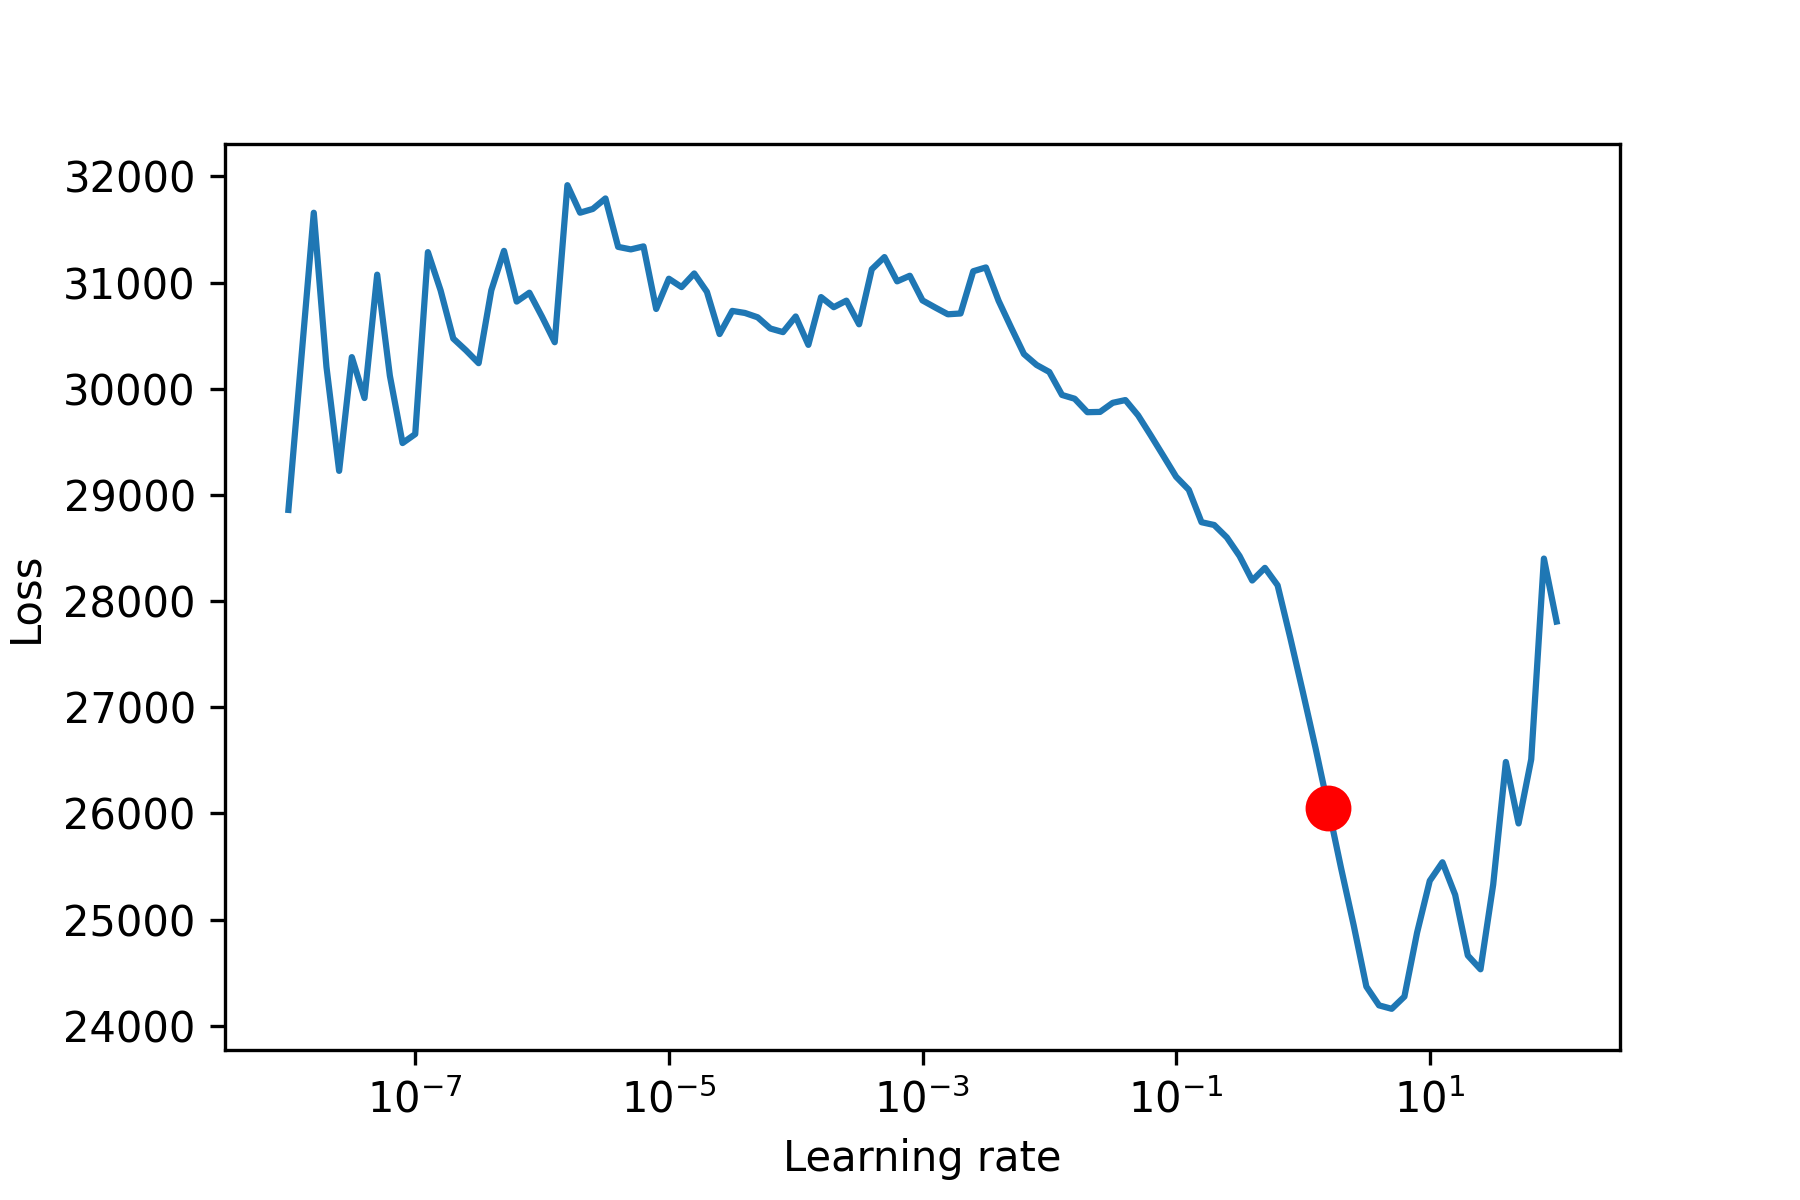

{'image/png': {'width': 400}}


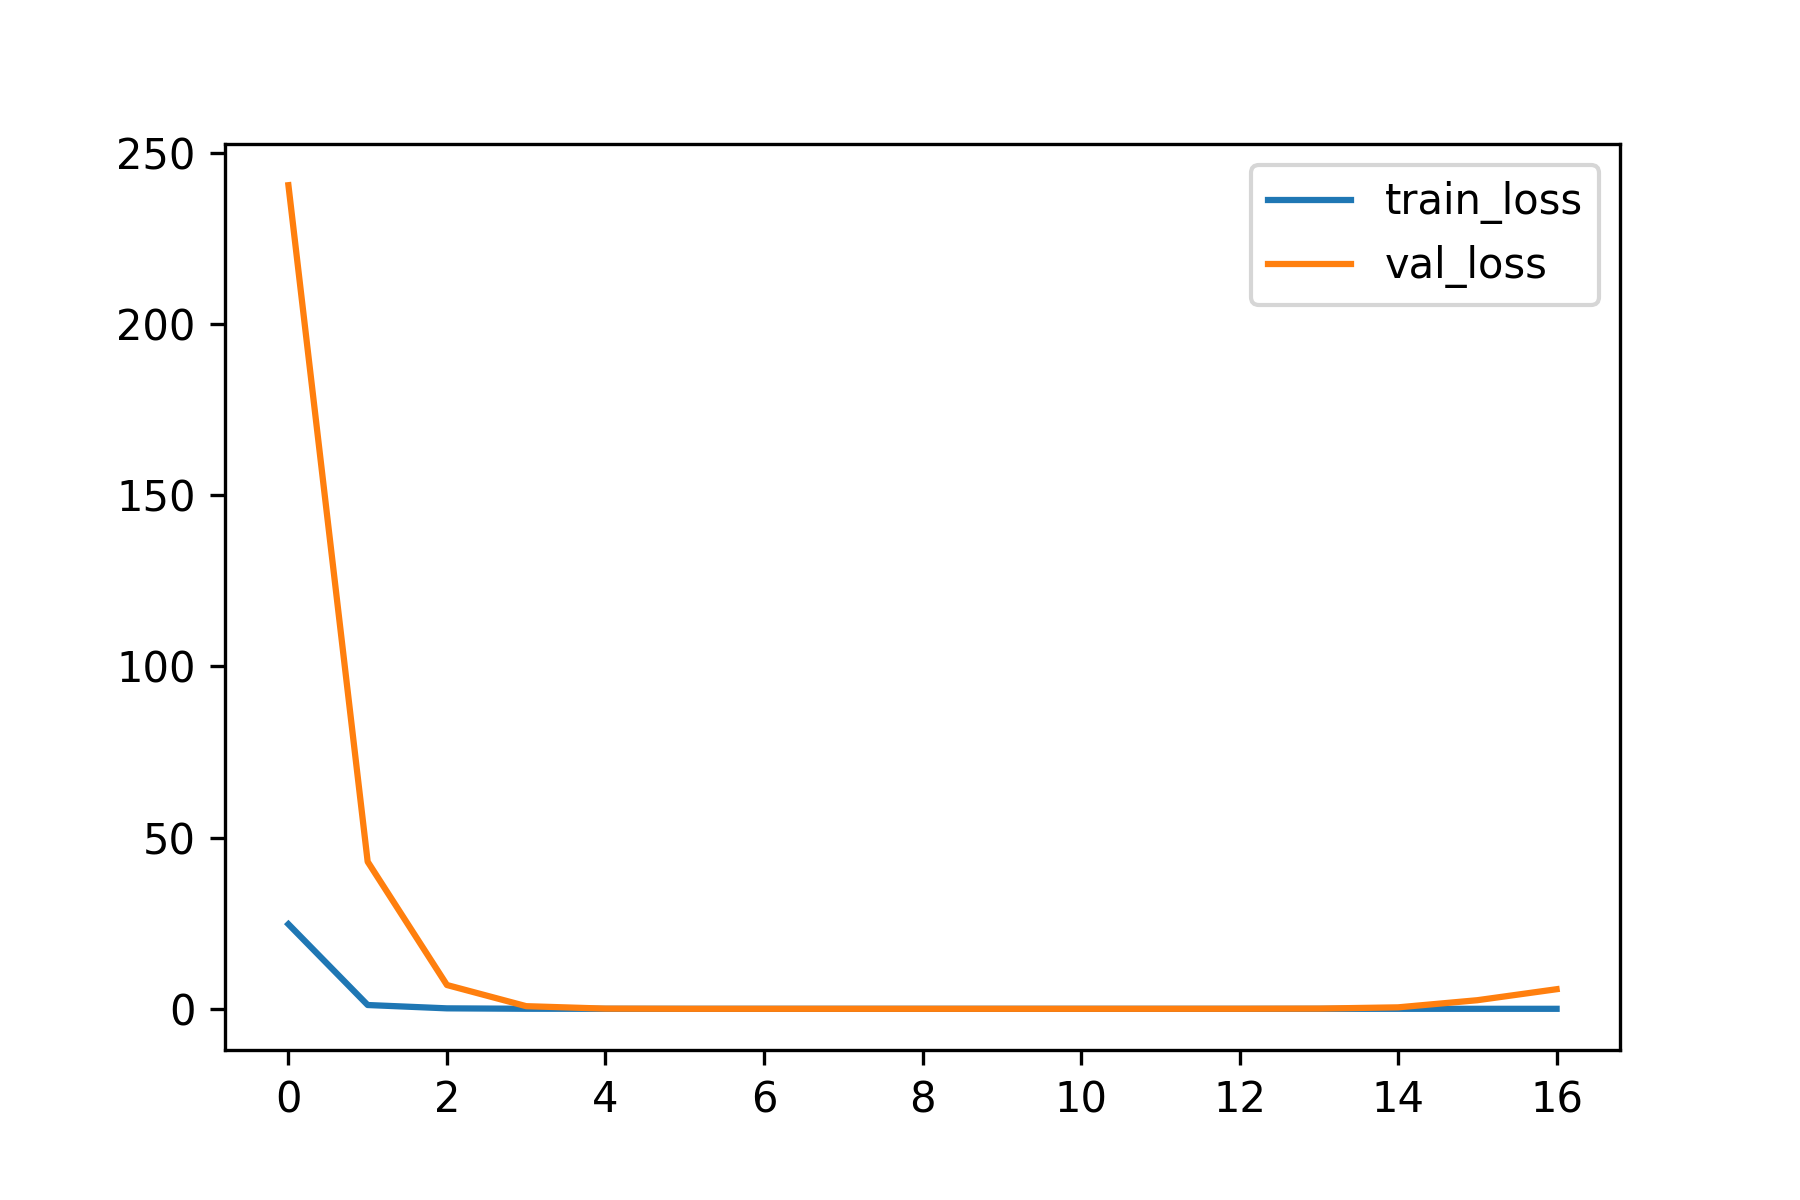

{'image/png': {'width': 400}}


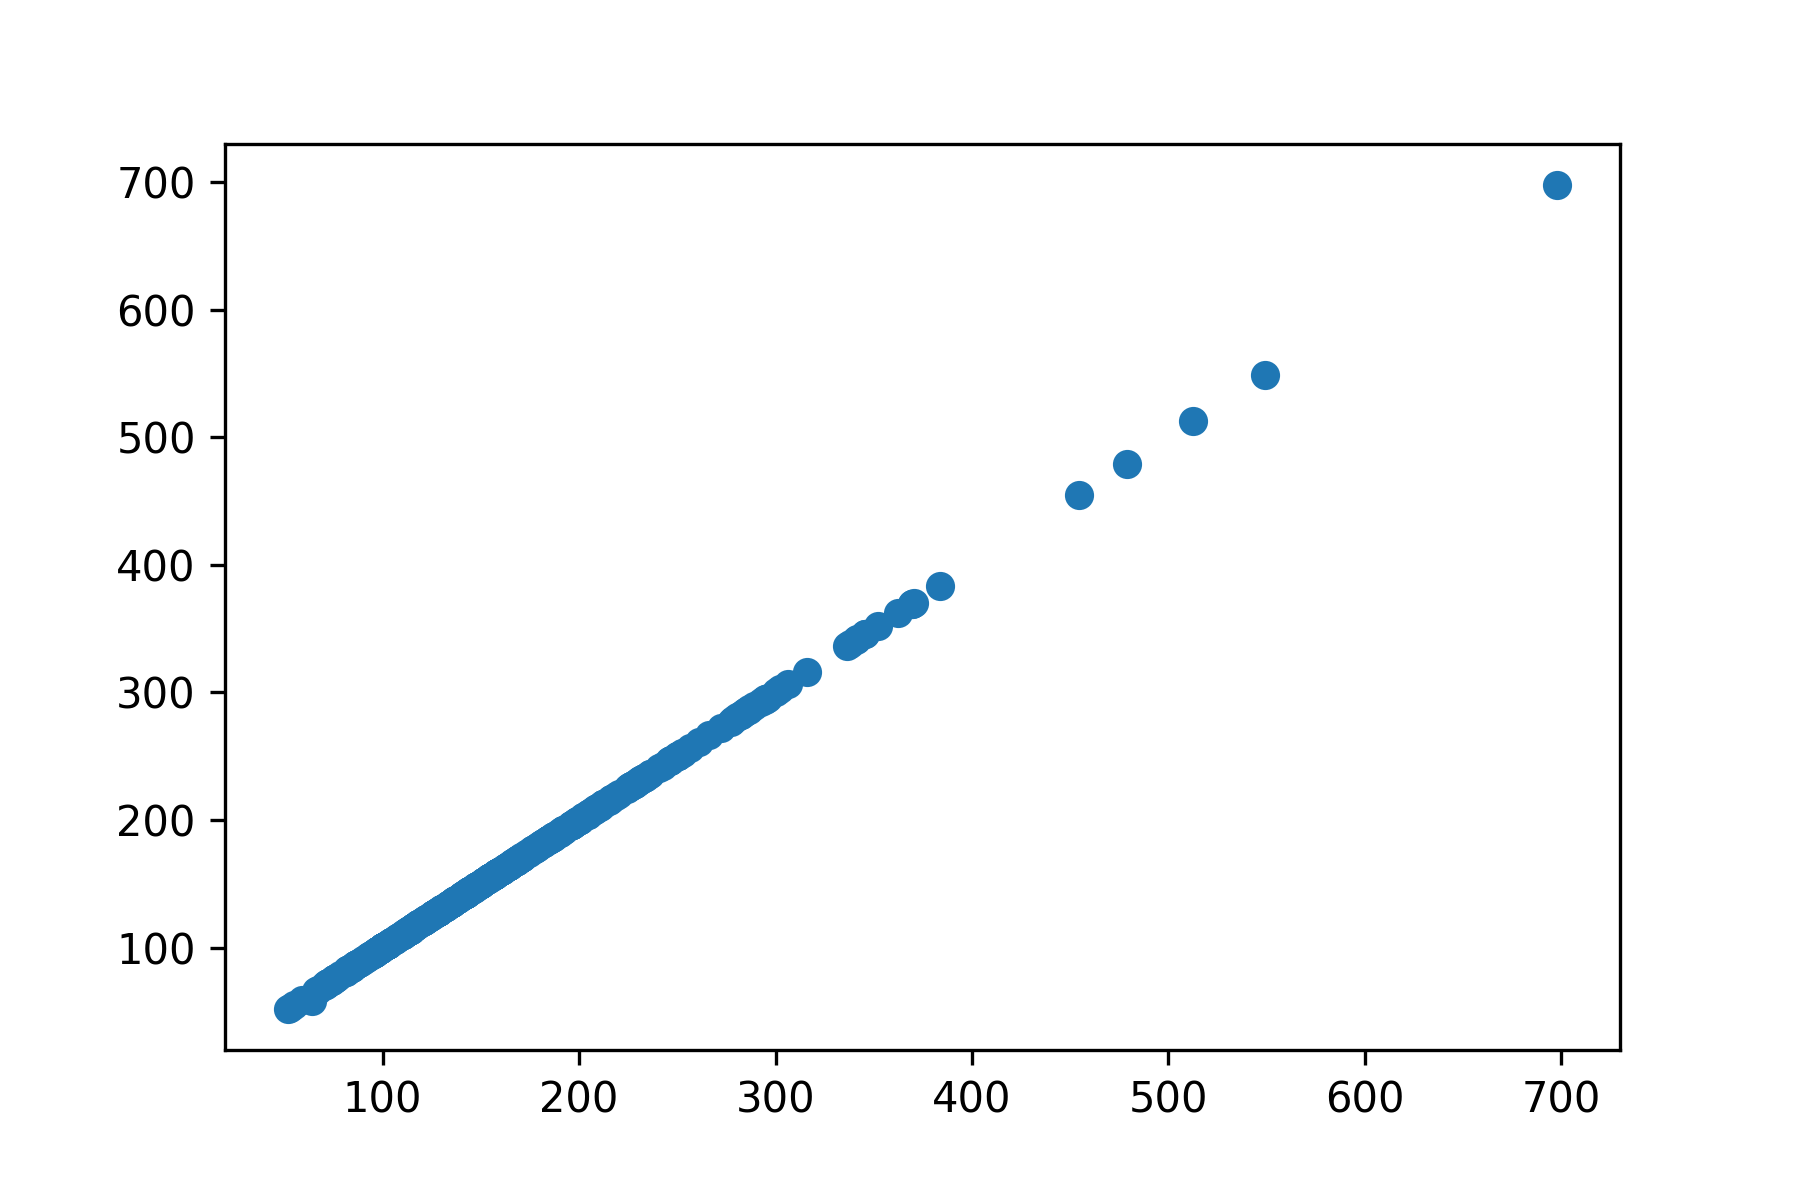

{'image/png': {'width': 400}}


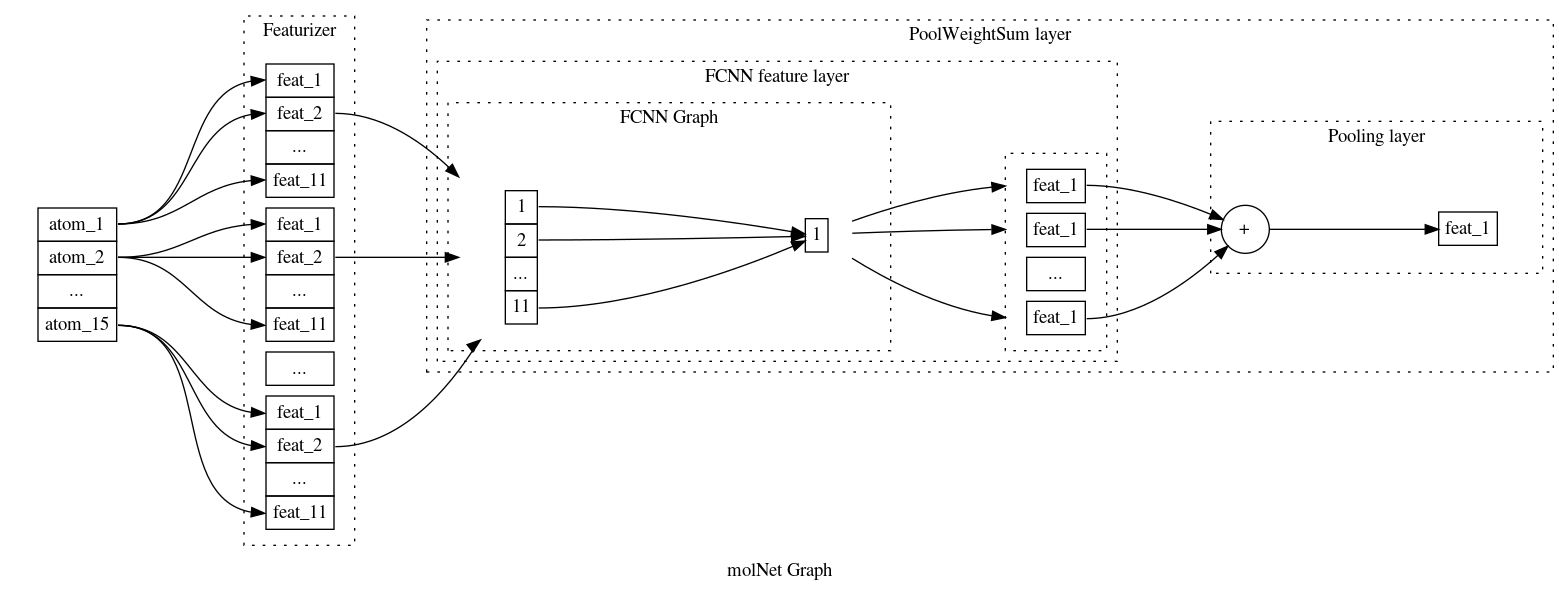

sample molecule:

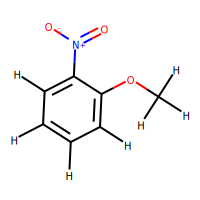

true (calculated) mass: 153.13699340820312 and predicted mass 153.13604736328125

true masses on each atom:

{'image/png': {'width': 400}}


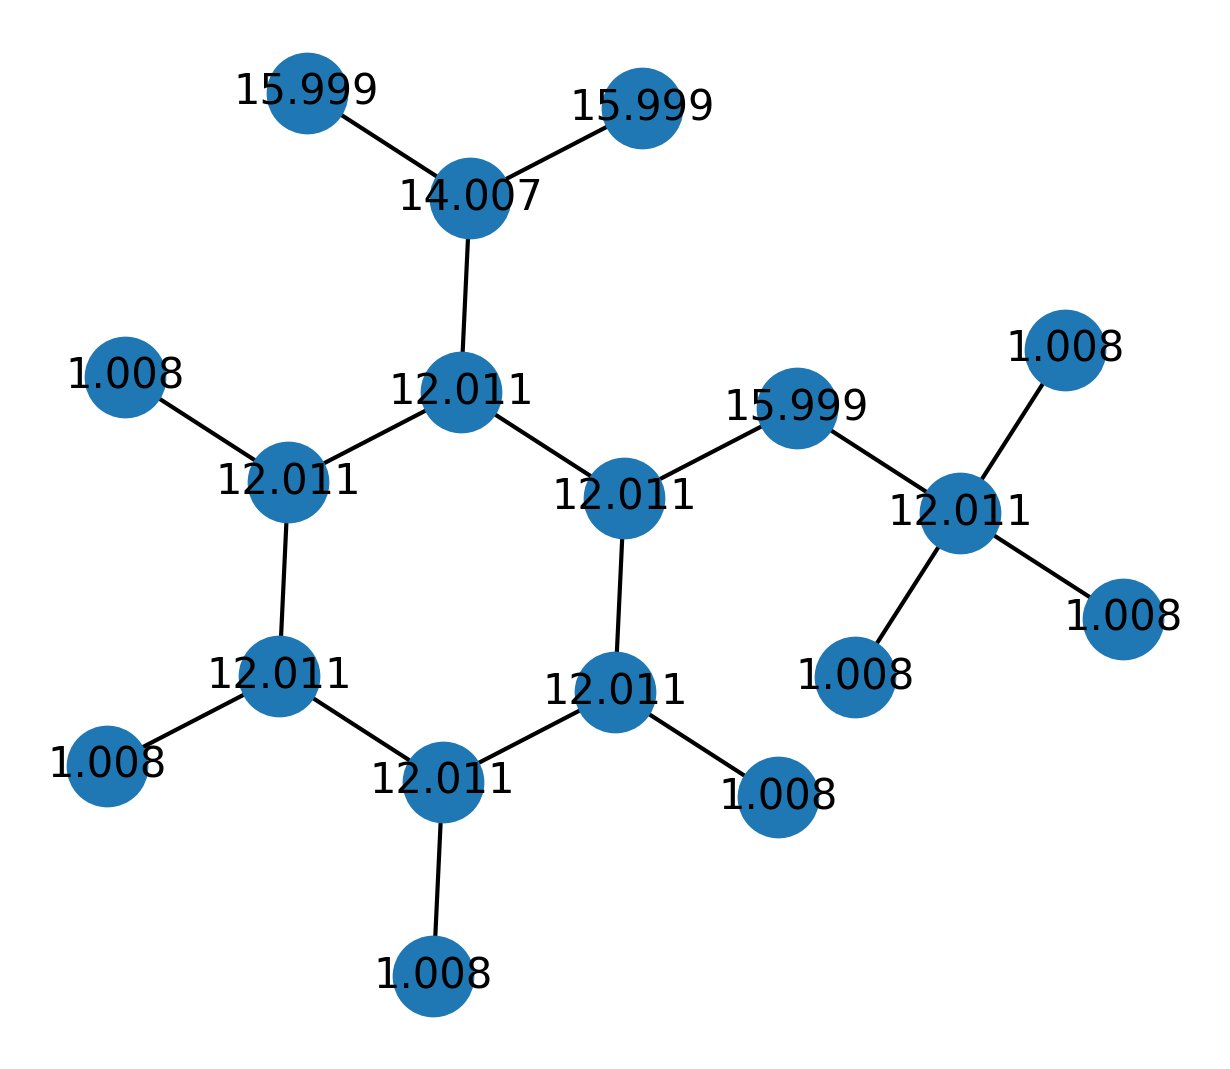

predicted masses on each atom:

{'image/png': {'width': 400}}


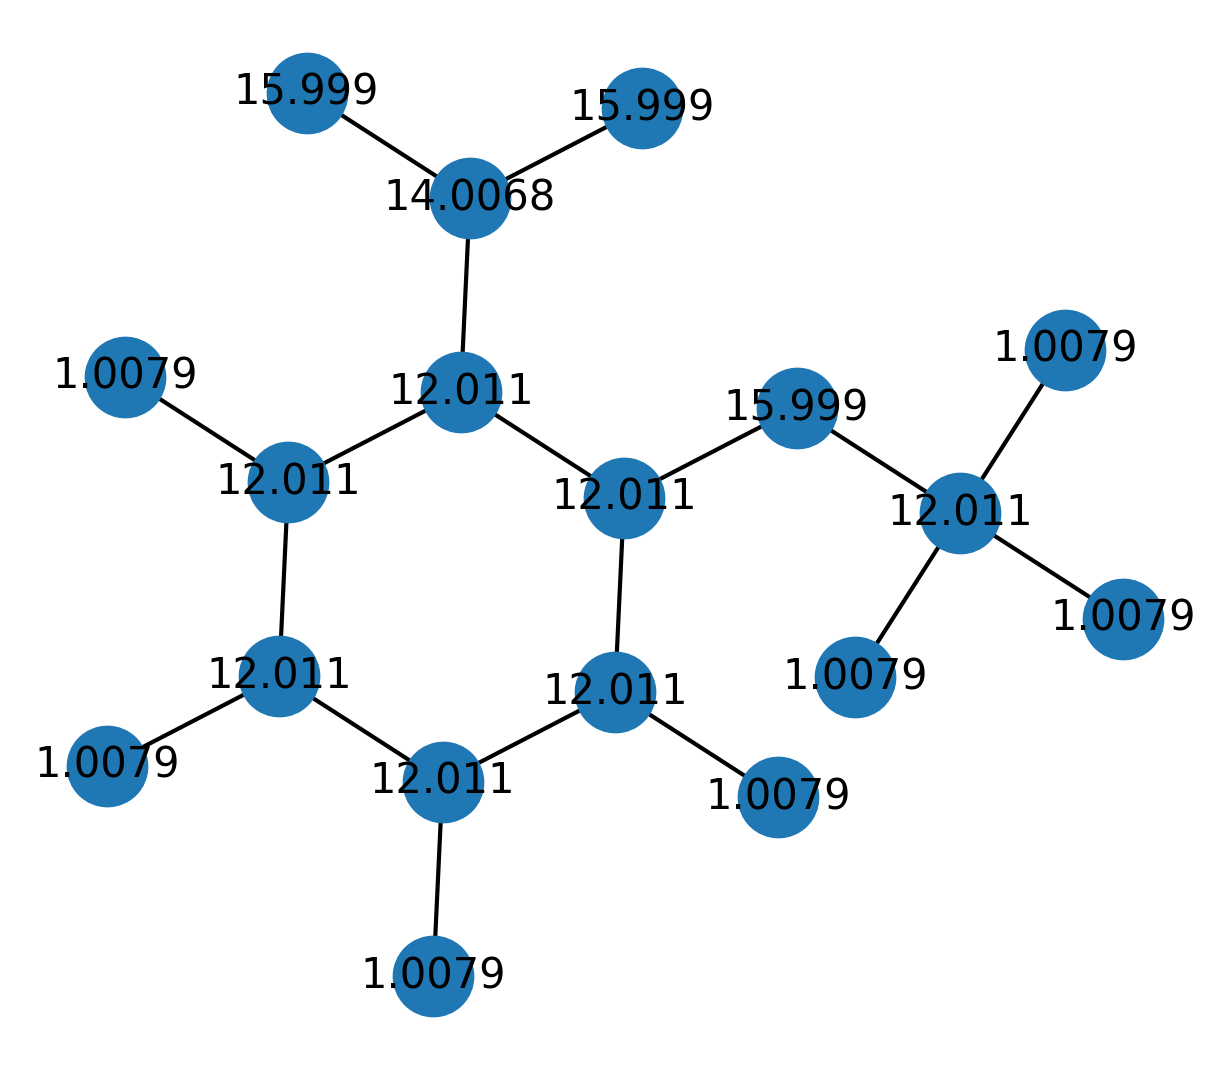

As can be seen the atomic mass prediction is quite good and correct up o the third decimal place. The difference will become smaller if trained for mor epochs but at some point the gain will be dimishing small.
If we take a closer look at the weights from the weight-sum-network, it becomes clear, that the weights simply became tuned to the individual masses of the atom types and thus the output becomes the mass of the aotom whos featuer vector was feed into the network (note that "other" is a placeholder for all atomic symbols not in the feature vector, if none are present in the training data it's value is random):

{'image/png': {'width': 400}}


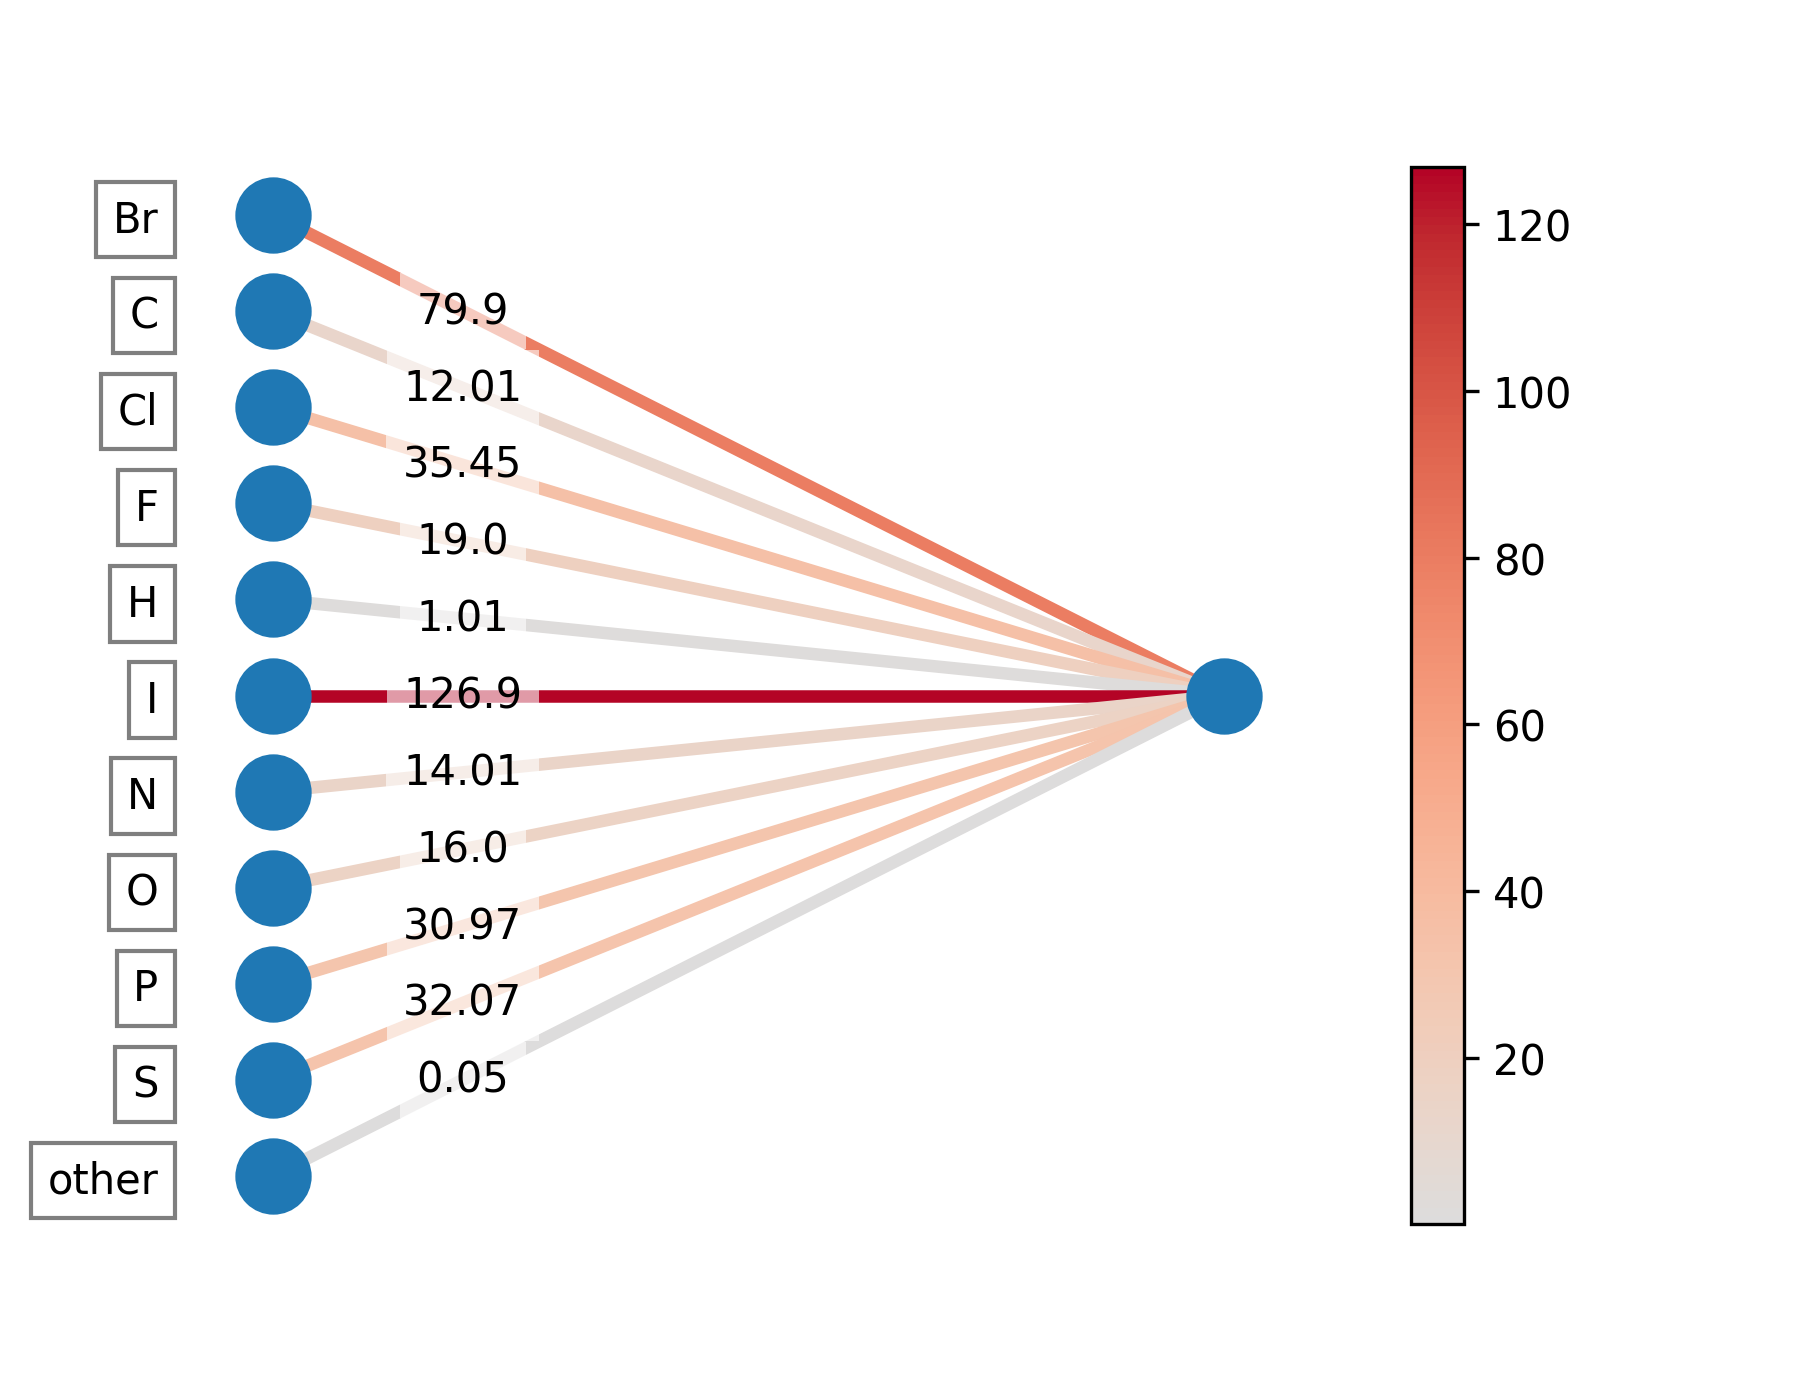

Another way to understand this is to think about the featurizer as a tool creating one or muliple copies of the initial graph - in this case the graph of the molecular structure -
and each of the nodes in each graph can hold exactly one value. Pooling takes each subgraph and merges als if its nodes into the a single single value. The lengh of the resulting pooling operation is equal to the number of features the pooling is applied to.
In the above example the featurizer creates subgraphs whos value are determined by the underliing atomic symbol:

Each graph ist then multiplied with the respective weight of the weighted sum pooling layer:

Then sum pooling over each feature graph is applied, giving the sum of masses of each atom type in the molecule:

Br: 0.0  
C: 84.07693481445312  
Cl: 0.0  
F: 0.0  
H: 7.055300712585449  
I: 0.0  
N: 14.006814956665039  
O: 47.996986389160156  
P: 0.0  
S: 0.0  
other: 0.0  


resulting in the total mas of 153.13603687286377 g/mol. Which is pretty much the same as the calculated value of 153.13699340820312 g/mol

A property that cannot directly deriven from the atomic symbol is hybridization, since it depends (in general) on the atom and the number of connected atoms (e.g. Carbon with  connections to four other atoms is $sp^3$-hybridized and with three connections usually is $sp^2$-hybridized)

this can be implemented by adding the atom degree (number connected atoms) featurization to the featurizer add in intermediate hidden layer, which combines the atom-type features and the degree, which then results in an output for the hybridization:

{'image/png': {'width': 400}}


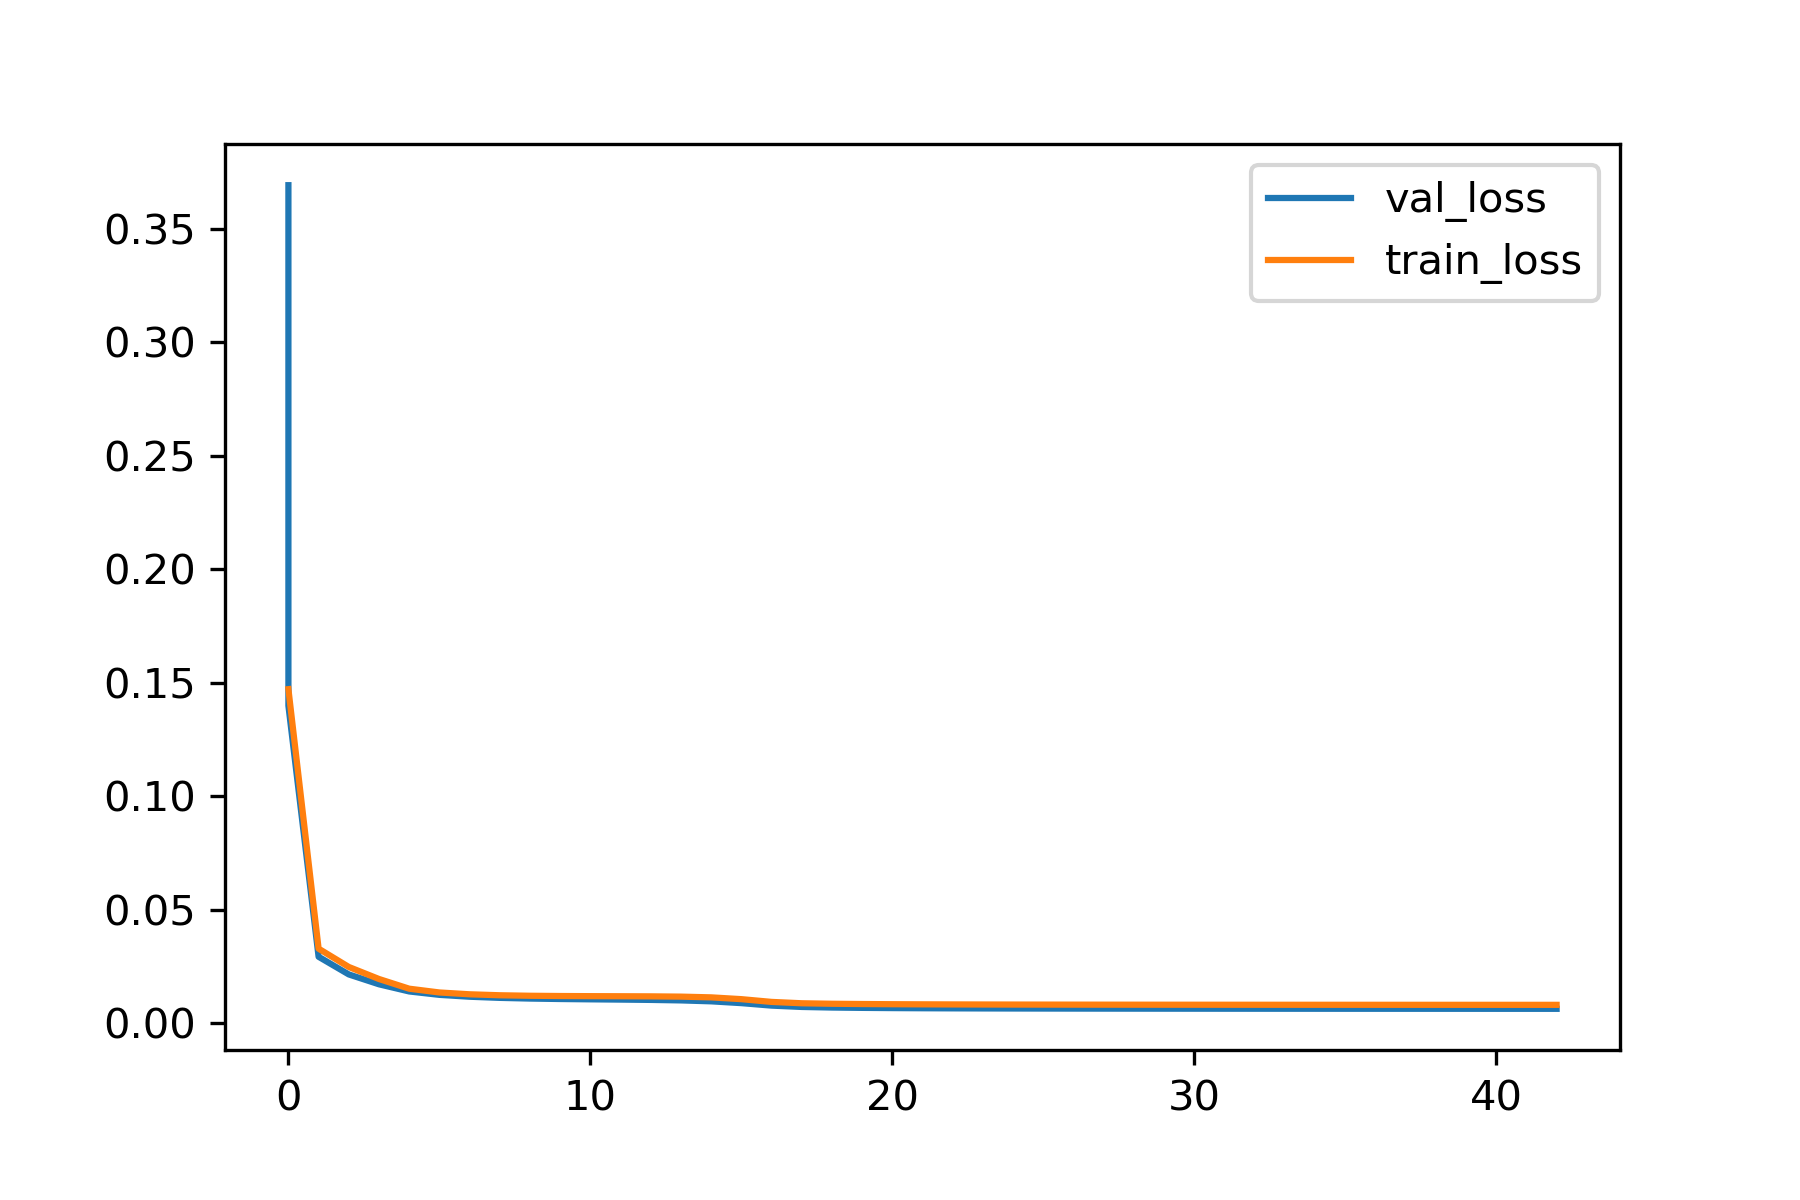

{'image/png': {'width': 400}}


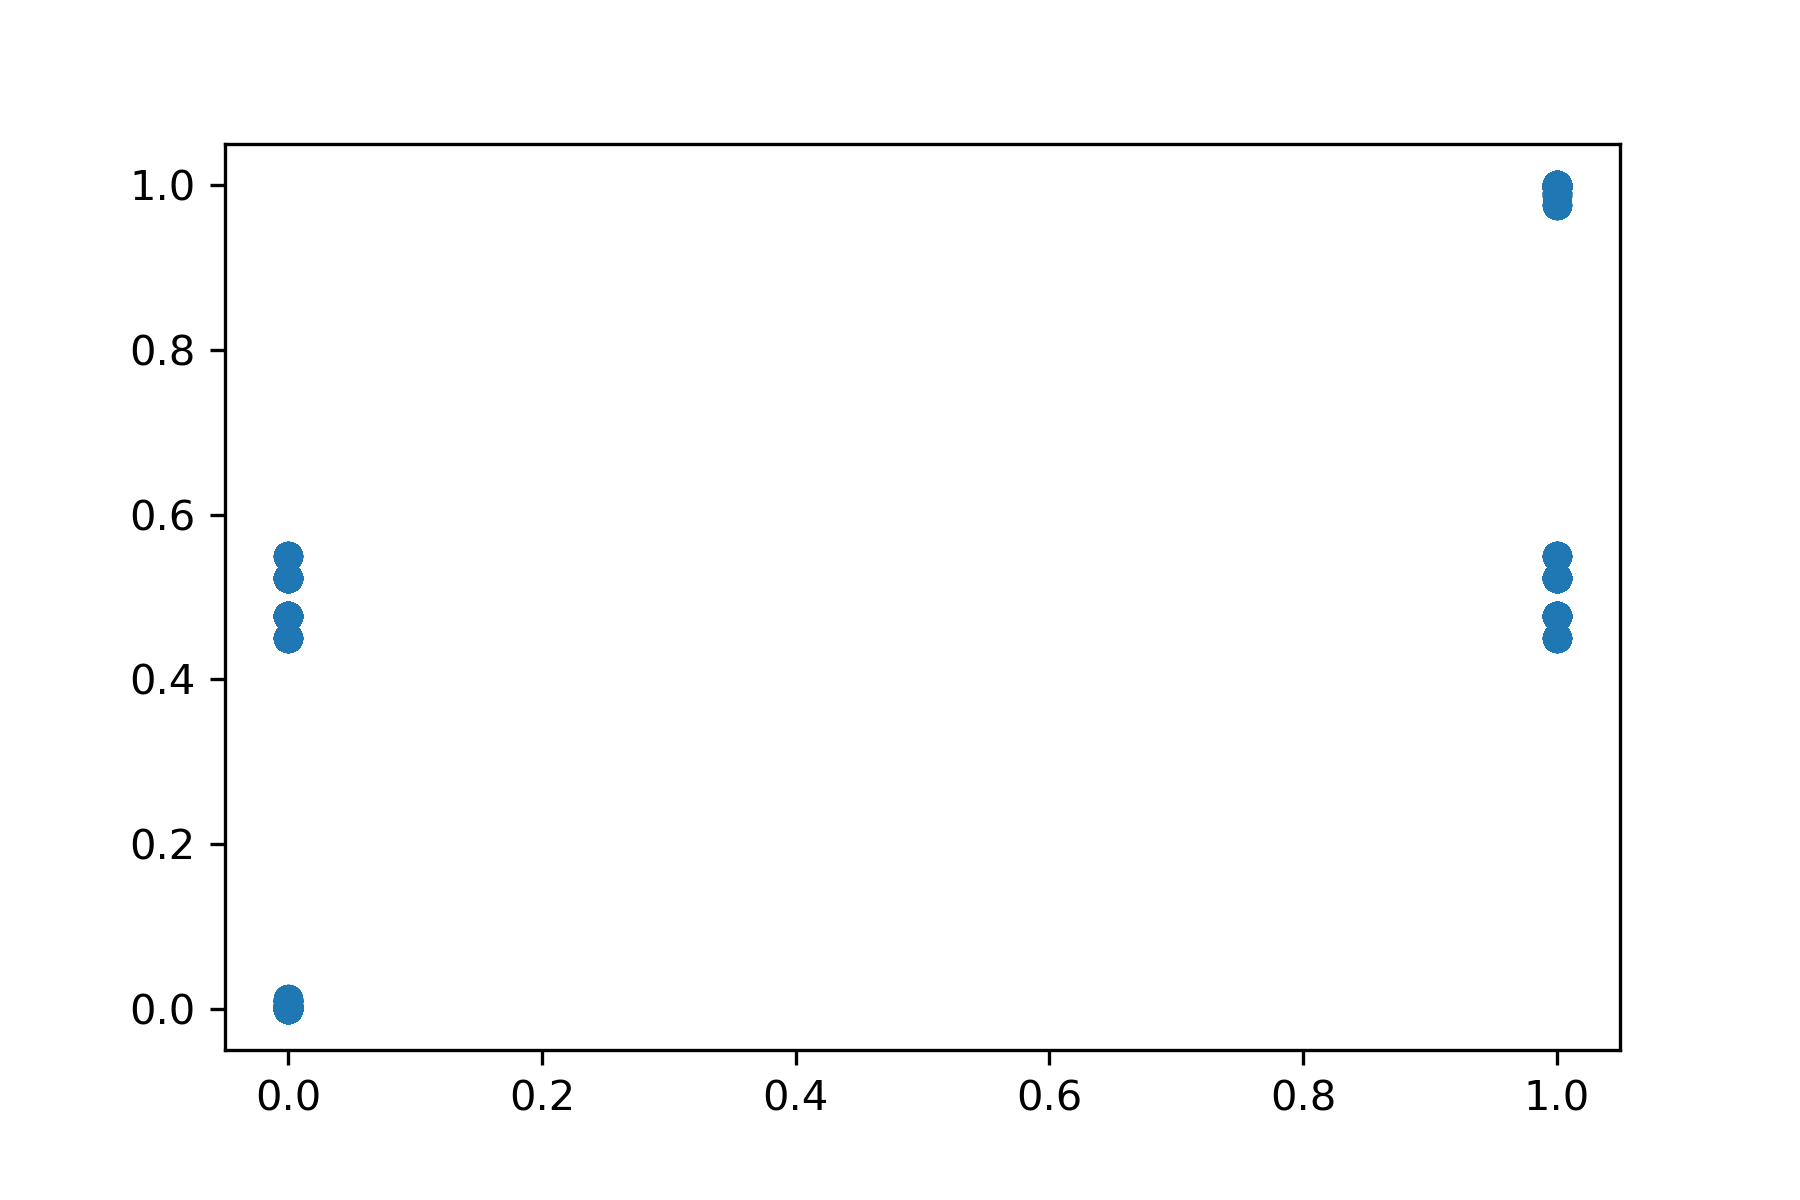

{'image/png': {'width': 400}}


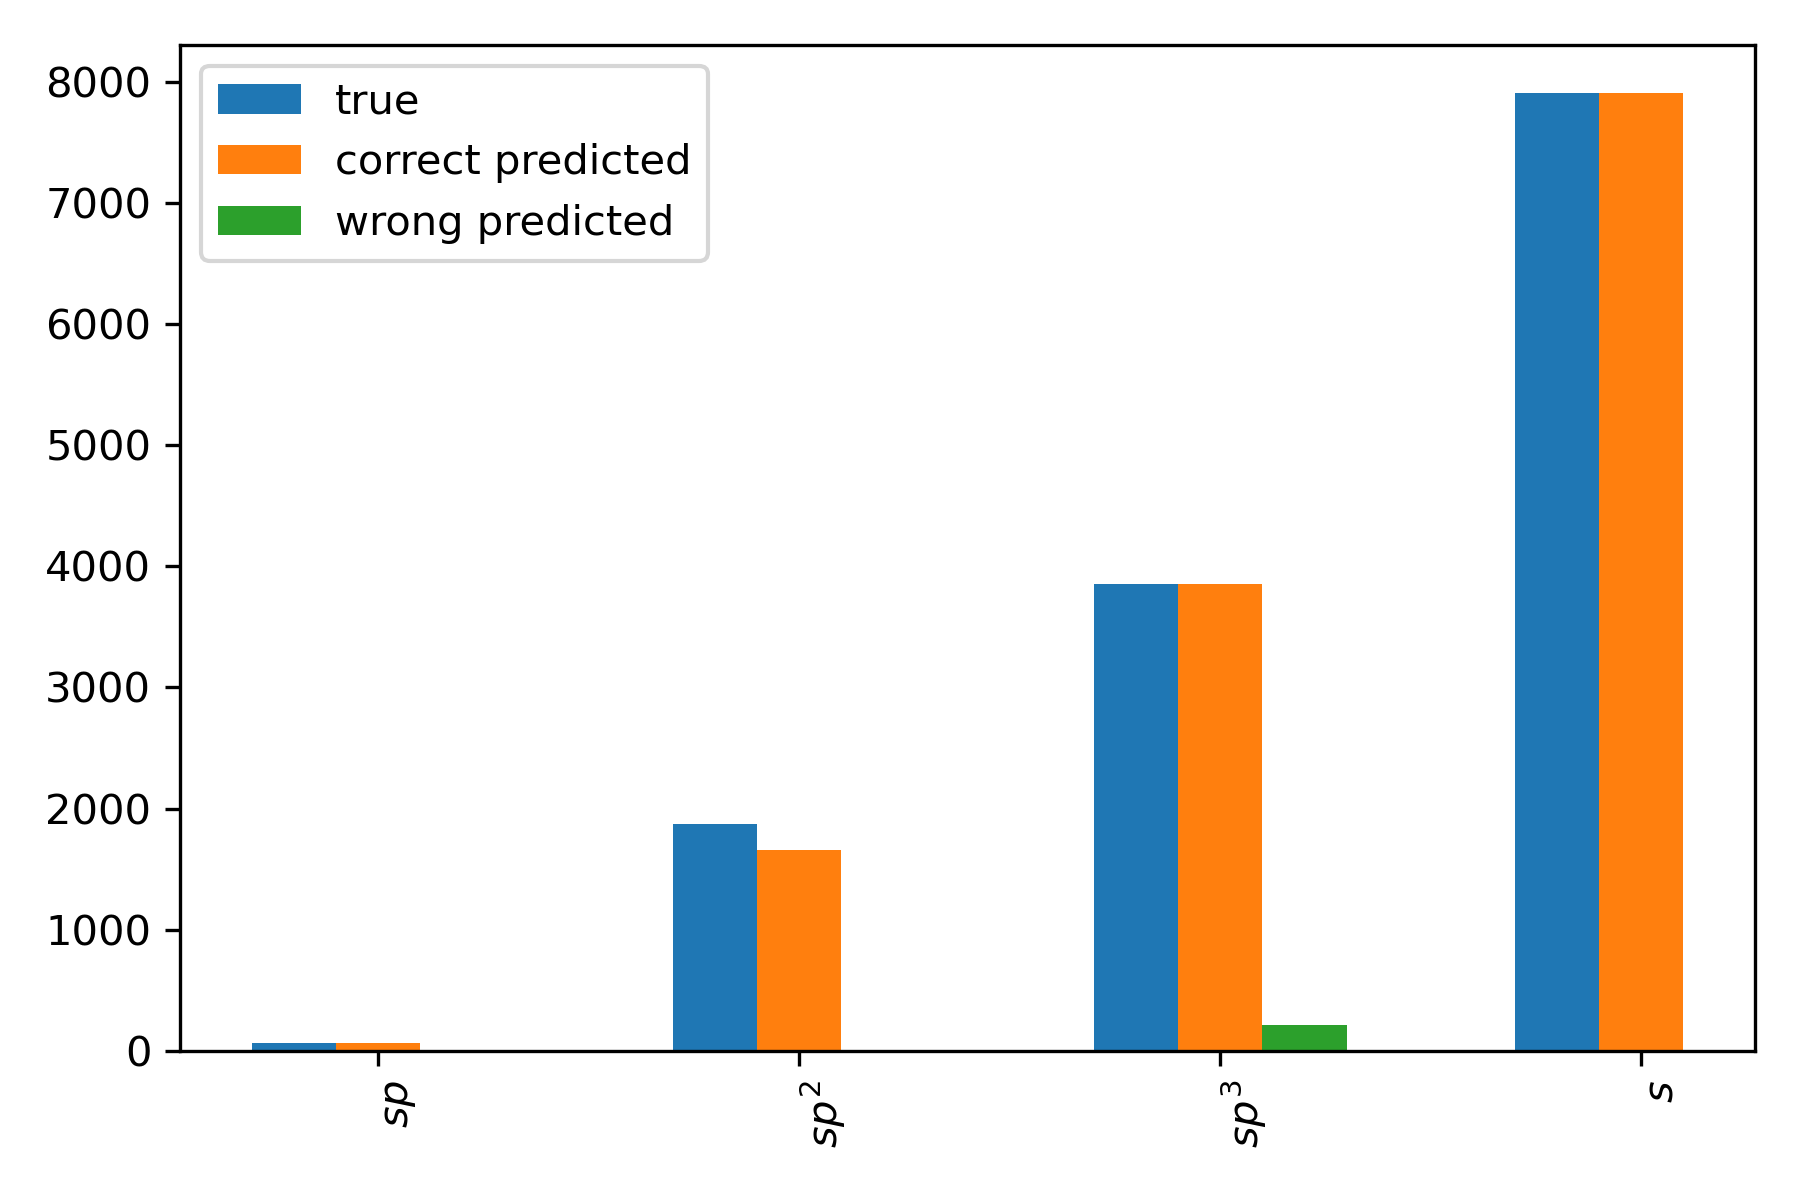

{'image/png': {'width': 400}}


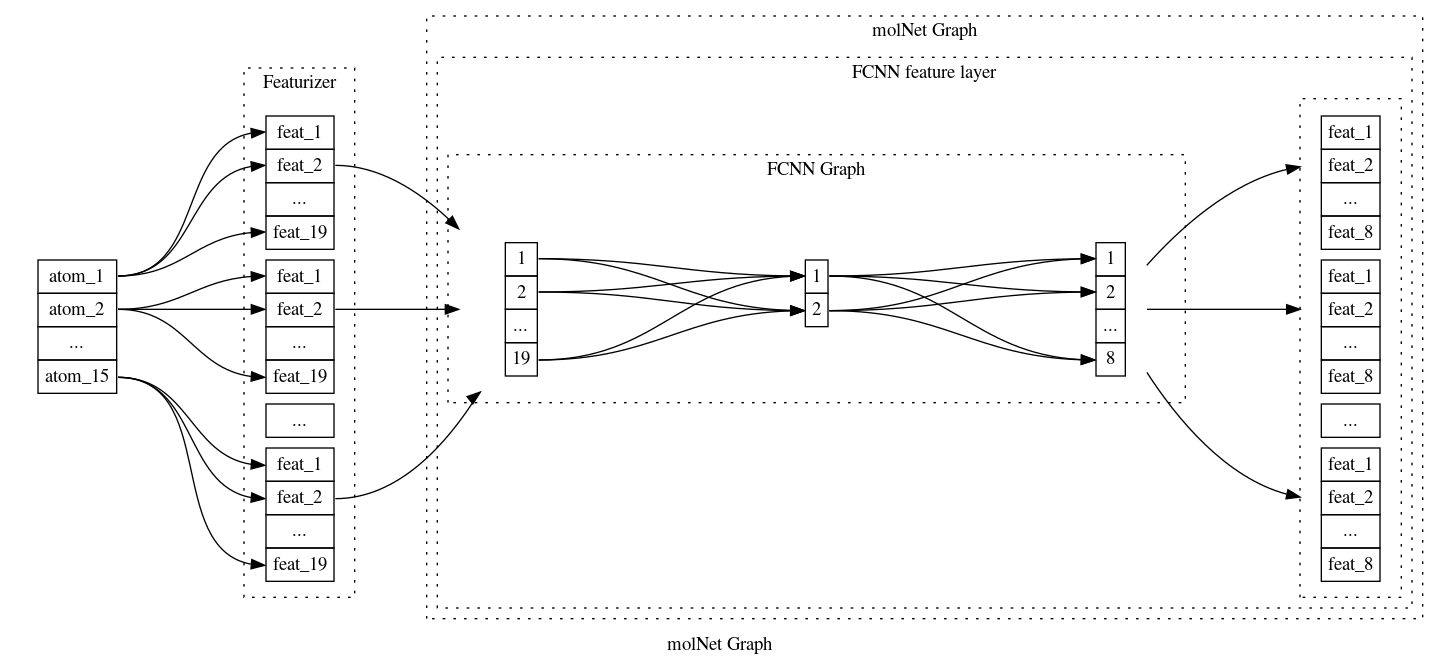

As can be seen, model predicts the true hybridization correctly for nearly every atom in the test data.
The network that predicts the hybrodiztion from atom type and degree can be representet as:

{'image/png': {'width': 400}}


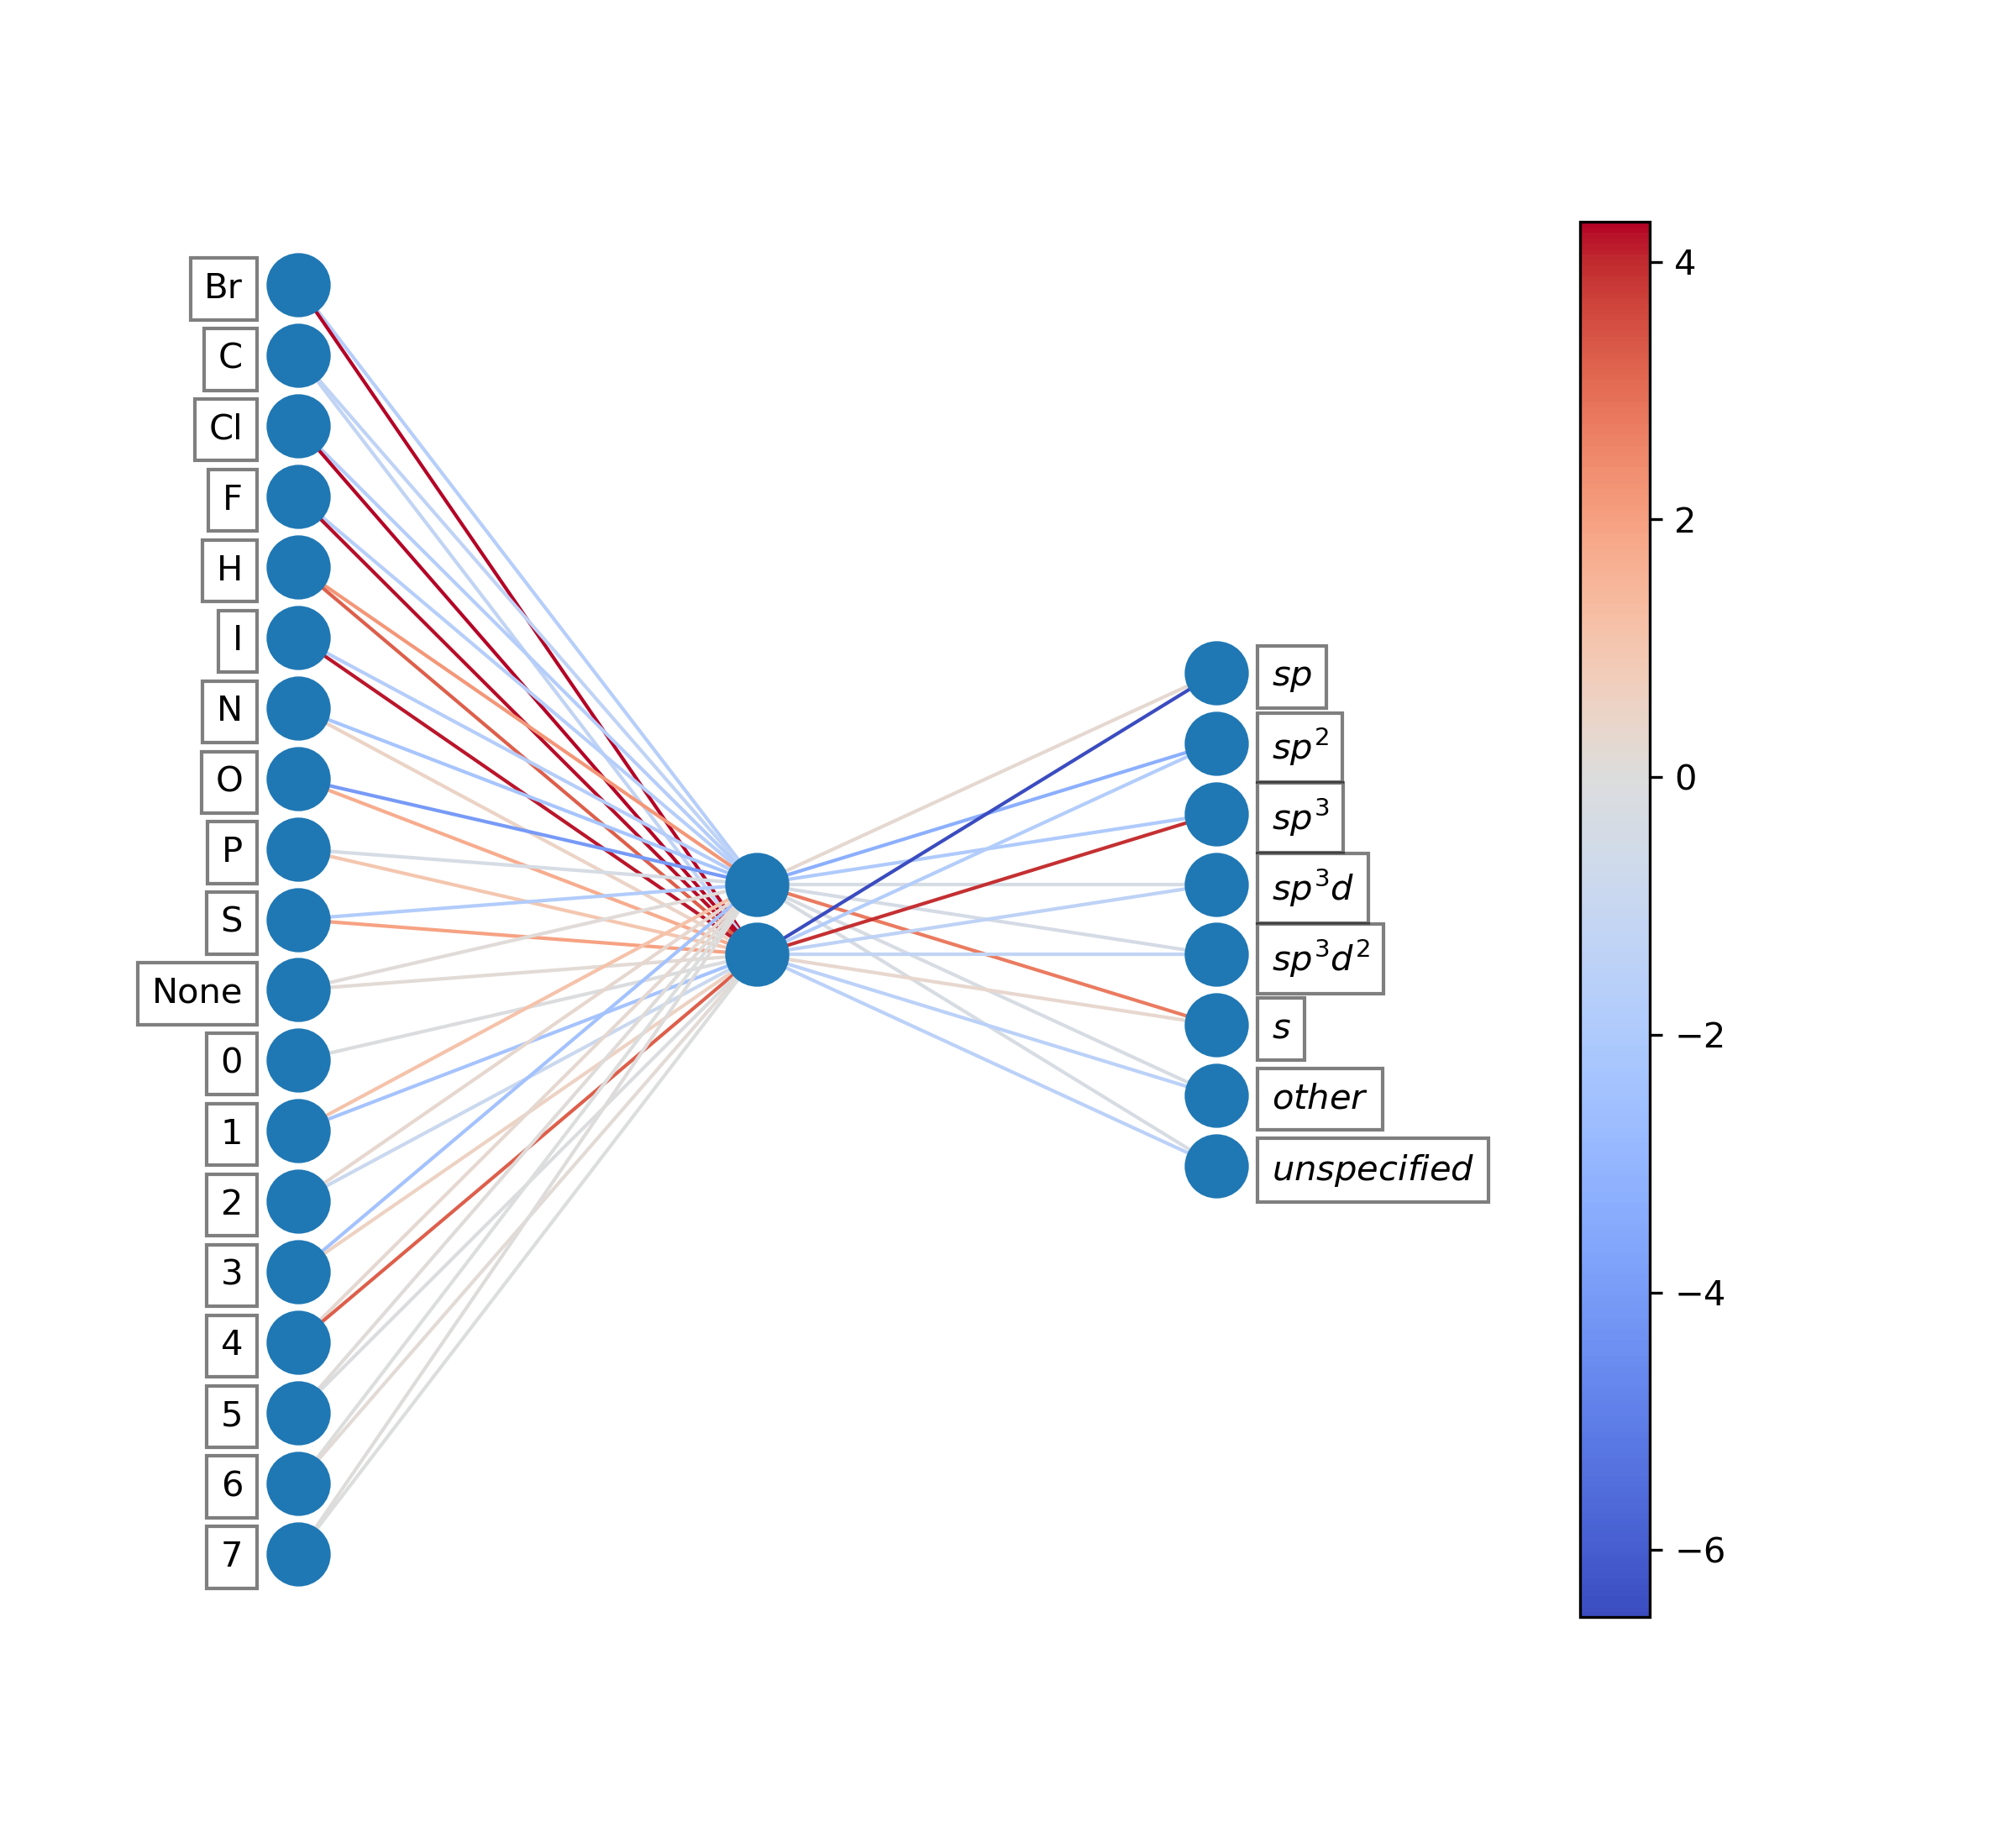

even this very small network which is hard to interpret if one looks at the complete structure all at once. It is much easier to look at only the important parts for certain inputs and try to get how the output is created:
For example if we use

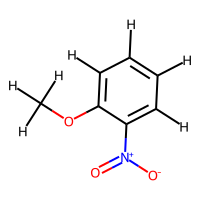

1-Methoxy-2-nitrobenzene

As input the resulting prediction can be represented on the molecular graph as:

{'image/png': {'width': 400}}


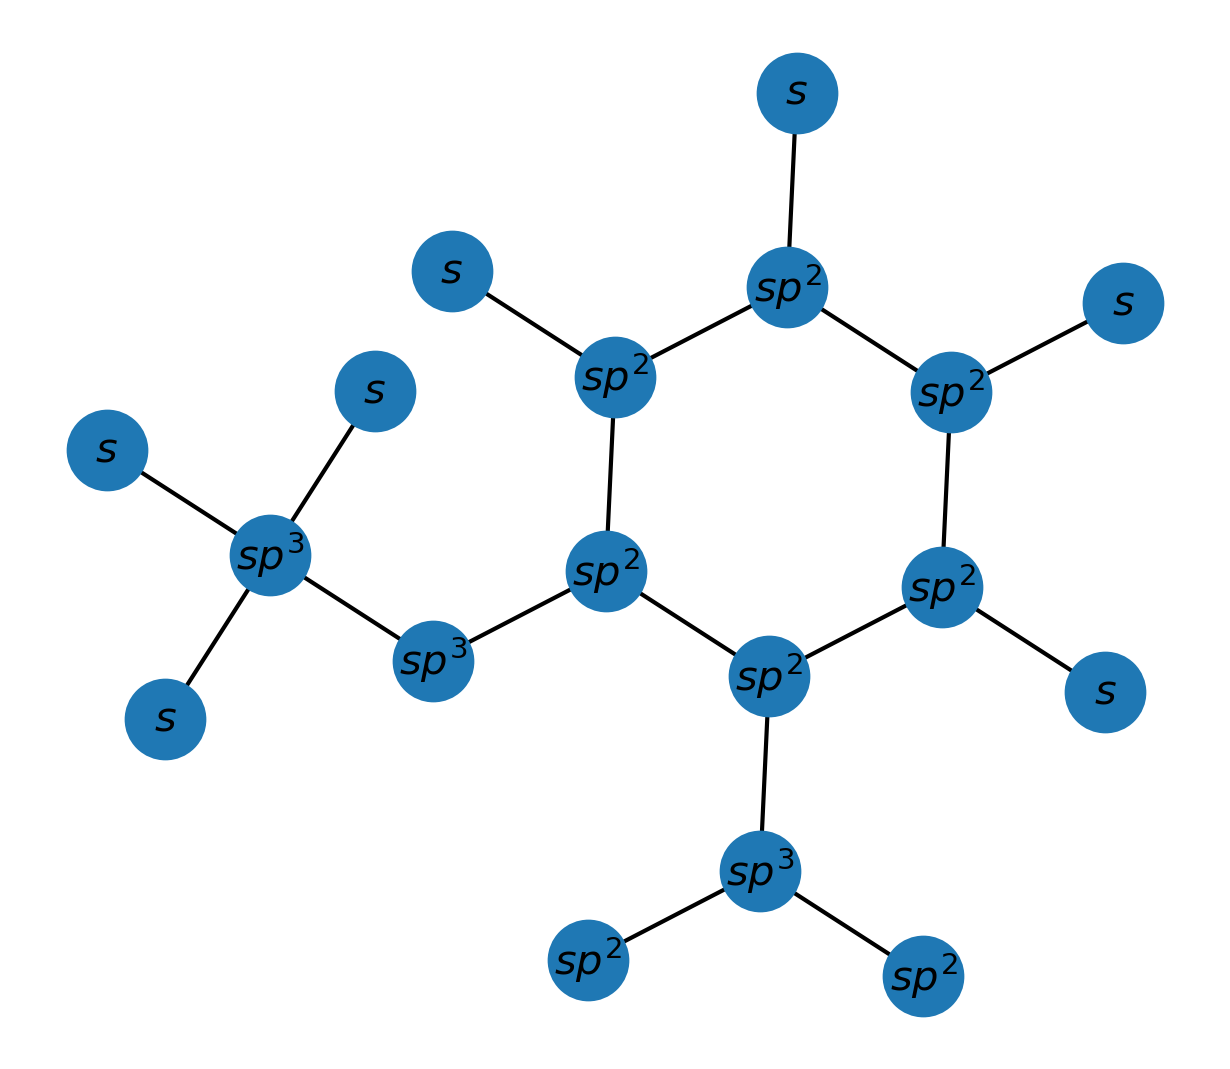

Exception: unknown op type error

In [9]:
show_notebook(os.path.join("intro.ipynb"))
show_notebook(os.path.join("predicting_start.ipynb"))
show_notebook(os.path.join("predicting_intro_gc.ipynb"))